In [1]:
import numpy as np
import scipy
import pandas as pd
from scipy import stats
from sklearn import metrics
import matplotlib.pyplot as plt

 - https://stackoverflow.com/questions/64192772/why-do-coefficient-of-determination-r%c2%b2-implementations-produce-different-resul
 - https://en.wikipedia.org/wiki/Coefficient_of_determination
 - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
 - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score
 - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html#sklearn.metrics.explained_variance_score

In [2]:
def calcR2_wikipedia(y, yhat):
    y_mean = np.mean(y)
    SS_tot = np.sum((y - y_mean)**2)
    SS_res = np.sum((y - yhat)**2)
    R2 = 1.0 - (SS_res / SS_tot)
    return R2

In [3]:
def calcR2_stackOverflow(y, yhat):
    SST = np.sum((y - np.mean(y))**2)
    SSReg = np.sum((yhat - np.mean(y))**2)
    R2 = SSReg/SST
    return R2

In [4]:
np.random.seed(12345)

In [5]:
x = np.linspace(-3, 3, 1001)
yh = np.polynomial.polynomial.polyval(x, [1, 2])
e = np.random.randn(x.size)
yn = yh + e

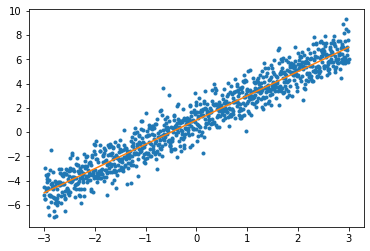

In [6]:
fig, axe = plt.subplots()
axe.plot(x, yn, '.')
axe.plot(x, yh, '-')

In [7]:
calcR2_wikipedia(yn, yh)

0.9265536406736125

In [8]:
calcR2_stackOverflow(yn, yh)

0.920522875218755

In [9]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(yh, yn)
R2 = r_value**2
R2

0.9265643732071487

In [10]:
r_value

0.9625821384210018

In [11]:
metrics.r2_score(yn, yh)

0.9265536406736125

In [12]:
metrics.r2_score(yh, yn)

0.920212273834683

In [20]:
metrics.explained_variance_score(yh, yn)

0.9202131965553927

In [19]:
np.sqrt(metrics.explained_variance_score(yh, yn))

0.9592774346117982

In [15]:
C = np.cov(yh, yn)
C[1,0]/np.sqrt(C[0,0]*C[1,1])

0.9625821384210017